# 01-grad-otsu-max.ipynb
This notebook is to begin the segmentation procedure outline in `README.md`. 
Steps performed here include:
- [Load data](#load-data)
- [(A) Smooth image](#a-smooth-image)
- [(B) The gradient magnitude of A](#b-calculate-gradient)
- [(C) Explorative method for selecting some maxima using multi-Itsu thresholding](#c-select-maxima-with-multi-otsu)

# Import packages

In [3]:
# Standard library imports
from pathlib import Path
# Third-party imports
import imagecodecs  # dependency required for loading compressed tif images
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters, morphology, util

# Load data

In [4]:
project_dir = Path('..').resolve()
print(project_dir)

C:\Users\cgusb\Research\mhe-analysis


In [14]:
img_path = Path(project_dir / 'IDOX_500.tif')   
img = iio.imread(img_path)
print(f'{img.shape=}')
print(f'{img.dtype=}')

img.shape=(1004, 924)
img.dtype=dtype('uint16')


In [8]:
def plot_img(img):
    fig, ax = plt.subplots(figsize = (8, 8))
    ax.imshow(img)
    ax.axis('off')
    return fig, ax

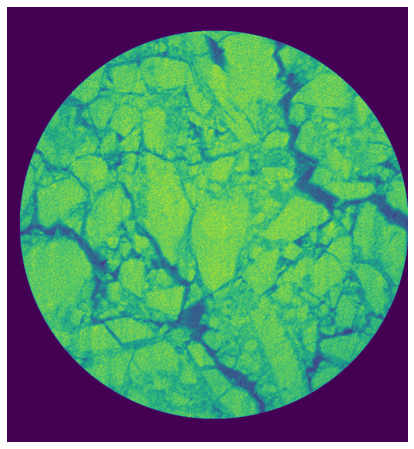

In [11]:
fig, ax = plot_img(img)

# (A) Smooth image

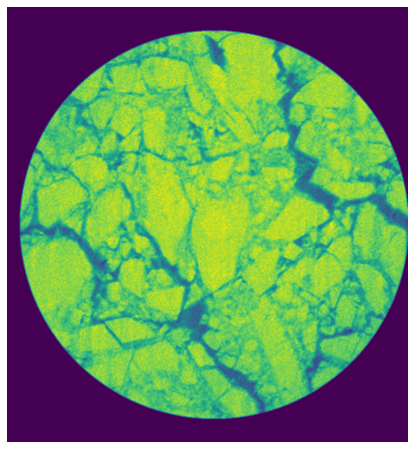

In [15]:
img_smooth = filters.gaussian(img)
fig, ax = plot_img(img_smooth)

# (B) Calculate gradient

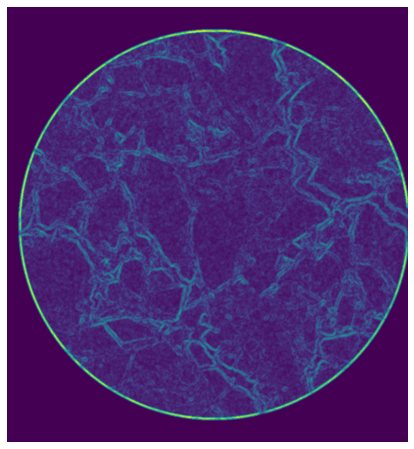

In [16]:
img_grad = filters.rank.gradient(img_smooth, morphology.disk(3))
fig, ax = plot_img(img_grad)

# (C) Select maxima with multi-Otsu

In [17]:
thresholds = filters.threshold_multiotsu(img_smooth, classes=3)
thresholds

array([0.22145649, 0.55121652])

In [23]:
def thresh_multiotsu(img, n_classes=3, show_process=False): 
    thresholds = filters.threshold_multiotsu(img_smooth, classes=n_classes)
    img_multiotsu = np.zeros_like(img)
    if show_process:
        fig, axes = plt.subplots(1, 3, figsize=(12, 5))
        ax = axes.ravel()
        ax[0].imshow(img)
        ax[1].hist(img.ravel(), bins=256)
        for i, thresh in enumerate(thresholds):
            ax[1].axvline(thresh, color='black')
            img_multiotsu[img > thresh] = (i + 1) * 1 / len(thresholds)
        ax[1].set_ylim([0, 15000])
        ax[2].imshow(img_multiotsu)
        return fig, axes
    else:
        for i, thresh in enumerate(thresholds):
            img_multiotsu[img > thresh] = (i + 1) * 1 / len(thresholds)
        return img_multiotsu

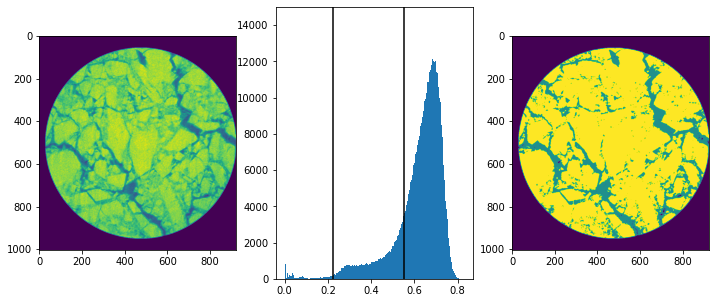

In [25]:
fig, axes = thresh_multiotsu(img_smooth, n_classes=3, show_process=True)

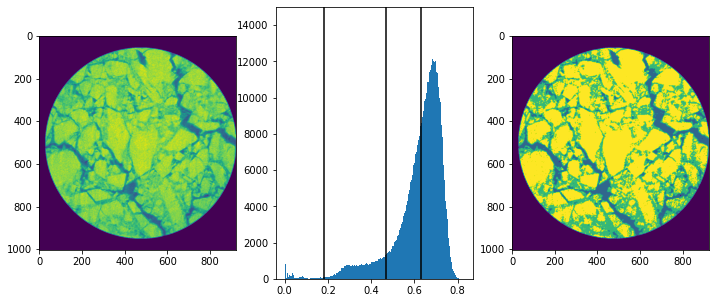

In [26]:
fig, axes = thresh_multiotsu(img_smooth, n_classes=4, show_process=True)